In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('seaborn-v0_8')

In [2]:
train = pd.read_csv(r'C:\Users\Abdul\Workspace\IEEE_Victoris2_competition\data_joined\train_joined.csv')
test = pd.read_csv(r'C:\Users\Abdul\Workspace\IEEE_Victoris2_competition\data_joined\test_joined.csv')

C:\Users\Abdul\AppData\Local\Temp\ipykernel_12424\4268846382.py:1: DtypeWarning: Columns (11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r'C:\Users\Abdul\Workspace\IEEE_Victoris2_competition\data_joined\train_joined.csv')


#### The training data

In [3]:
train.head(5)

,unnamed:_0,person_description,place_code,customer_order,additional_features_in_market,promotion_name,store_kind,store_sales,store_cost,is_recyclable?,yearly_income,store_area,grocery_area,frozen_area,meat_area,cost,gross_weight,net_weight,package_weight
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,recyclable,10K+,2842.23,2037.64,481.98,323,602.7575,28.1997,26.6008,1.5990
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650,16.5710,14.9720,1.5990
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647,28.6358,27.1822,1.4536
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119,14.2161,11.2944,2.9217
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574,12.6172,9.7100,2.9072


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38862 entries, 0 to 38861
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     38862 non-null  object 
 1   person_description             38862 non-null  object 
 2   place_code                     38862 non-null  object 
 3   customer_order                 38860 non-null  object 
 4   additional_features_in_market  34562 non-null  object 
 5   promotion_name                 33034 non-null  object 
 6   store_kind                     33053 non-null  object 
 7   store_sales                    38847 non-null  object 
 8   store_cost                     38855 non-null  object 
 9   is_recyclable?                 38860 non-null  object 
 10  yearly_income                  38854 non-null  object 
 11  store_area                     35297 non-null  object 
 12  grocery_area                   35256 non-null 

The training data consists of 38862 rows and 19 columns. The columns are as follows:
- Unnamed : id
- Person Description : Description of the person visiting the market
- Place Code : Code for each place which consists of 2 city codes parts separated by "_"
- Customer Order : Order of each customer in the market
- Additional Features in market : A list of features that are found in the market
- Promotion Name : Made by the market on media
- Store Kind : A genre for the store
- Store Cost : Cost of the Store
- Store Sales : Sales of the Store
- Gross Weight : Bought item weight
- Net Weight : Bought item weight without the package
- Package Weight : Weight of the Package
- Is Recyclable? : If the item is Recyclable or no
- Yearly Income : min. Income for the consumer per year
- Store Area : Area of the store
- Grocery Area : Area of grocery department in the store
- Frozen Area : Area of frozen food department in the store
- Meat Area : Area of Meat department in the store
- Cost : The target variable

Let's first drop the Unnamed column as it is not needed.

In [5]:
train.drop(['unnamed:_0'], axis=1, inplace=True)

Let's now drop the duplicate rows.

In [6]:
train.duplicated().sum()

8

In [7]:
train.drop_duplicates(inplace=True, ignore_index=True)

In [8]:
train.shape

(38854, 18)

Now let's check for null values.

In [9]:
train.isnull().sum()

person_description                  0
place_code                          0
customer_order                      2
additional_features_in_market    4297
promotion_name                   5828
store_kind                       5808
store_sales                        15
store_cost                          7
is_recyclable?                      2
yearly_income                       8
store_area                       3564
grocery_area                     3605
frozen_area                      3551
meat_area                        3547
cost                               31
gross_weight                     2917
net_weight                       2893
package_weight                   5366
dtype: int64

Let's see the percentage of null values in each column. 

In [10]:
train.isnull().sum() / train.shape[0] * 100 

person_description                0.000000
place_code                        0.000000
customer_order                    0.005147
additional_features_in_market    11.059350
promotion_name                   14.999743
store_kind                       14.948268
store_sales                       0.038606
store_cost                        0.018016
is_recyclable?                    0.005147
yearly_income                     0.020590
store_area                        9.172801
grocery_area                      9.278324
frozen_area                       9.139342
meat_area                         9.129047
cost                              0.079786
gross_weight                      7.507593
net_weight                        7.445823
package_weight                   13.810676
dtype: float64

There are some null values in most of the columns but there percentages are not that high so we'll deal with them later.

### Cleaning the train data

Let's start by cleaning the Person Description column.

#### Person Description column

In [11]:
train['person_description'].value_counts()

person_description
Single Male with one child, education: bachelors degree working as professional                533
Married Female with four children, education: bachelors degree working as professional         506
Married Female with four children, education: partial high school working as skilled manual    484
Married Male with three children, education: bachelors degree working as professional          478
Single Female with one child, education: bachelors degree working as professional              410
                                                                                              ... 
Single Male with five children, education: partial college working as management                 2
Married Female with No children, education: high school degree working as management             2
Single Female with five children, education: partial college working as clerical                 2
Single Male with one child, education: partial high school working as management          

In [12]:
train['person_description'].nunique()

395

As we can see, in order to work with this column we will have to split it into more columns like :
- Marital status : single or married 
- Gender : male or female
- Number of children 
- Proffission : The proffission of the person

In [13]:
train['person_description'] = train['person_description'].str.split(' ')

In [14]:
train['person_description'][442]

['Married',
 'Male',
 'with',
 'three',
 'children,',
 'education:',
 'partial',
 'high',
 'school',
 'working',
 'as',
 'manual']

In [15]:
train['marital_status'] = train['person_description'].apply(lambda x: x[0])
train['gender'] = train['person_description'].apply(lambda x: x[1])
train['number_of_children'] = train['person_description'].apply(lambda x: x[3])
train['profession'] = train['person_description'].apply(lambda x: x[-1]) 

In [16]:
train['marital_status'] = train['marital_status'].apply(lambda x: 1 if x == 'Married' else 0)
train['gender'] = train['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [17]:
train.drop('person_description', axis=1, inplace=True)  

#### Place Code column

In [18]:
train['place_code'].value_counts()

place_code
T02ma_WA    3657
S01em_OR    3537
P07nd_OR    3282
S03le_WA    3244
H11go_ZA    3033
M10da_YU    2924
S04ne_WA    2877
B06ls_CA    2693
L05es_CA    2587
B14on_WA    2200
V13er_BC    2175
O09ba_VE    1660
C15ho_ZA    1497
A17co_GU     999
M12ty_DF     881
S18co_CA     497
B08am_WA     473
V19ia_BC     355
G16ra_JA     283
Name: count, dtype: int64

From looking at the value vounts we can see that :
- the first part of the value is different for each value.
- the second part of the value is common for some values.
  
So we can split the column into two columns and drop the original column.

In [19]:
train[['place_id', 'place_name']] = train['place_code'].str.split('_', expand=True)

In [20]:
train['place_name'].value_counts()

place_name
WA    12451
OR     6819
CA     5777
ZA     4530
YU     2924
BC     2530
VE     1660
GU      999
DF      881
JA      283
Name: count, dtype: int64

The plce id column dosn't seem to be useful so we can drop it.

In [21]:
train.drop('place_code', axis=1, inplace=True)
train.drop('place_id', axis=1, inplace=True)

#### Customer Order column

In [22]:
train['customer_order'].value_counts()

customer_order
Snack Foods from Snack Foods department, Ordered Brand : Horatio          952
Snack Foods from Snack Foods department, Ordered Brand : Nationeel        921
Snack Foods from Snack Foods department, Ordered Brand : Fast             896
Snack Foods from Snack Foods department, Ordered Brand : Fort West        886
Snack Foods from Snack Foods department, Ordered Brand : Best Choice      815
                                                                         ... 
Canned Sardines from Canned Foods department, Ordered Brand : Pleasant     18
Canned Clams from Canned Foods department, Ordered Brand : Blue Label      17
Canned Shrimp from Canned Foods department, Ordered Brand : Just Right     15
Packaged Vegetables from Produce department, Ordered Brand : Ebony         14
Packaged Vegetables from Produce department, Ordered Brand : High Top      13
Name: count, Length: 271, dtype: int64

In [23]:
train[['department','brand']] = train['customer_order'].str.split(',', expand=True)

In [24]:
train[['x','department']] = train['department'].str.split('from', expand=True)

In [25]:
train['department'] = train['department'].str.strip(' ')

In [26]:
train['department'].value_counts()

department
Produce department                5573
Snack Foods department            4470
Household department              4022
Frozen Foods department           3927
Baking Goods department           2878
Canned Foods department           2721
Dairy department                  2434
Health and Hygiene department     2410
Beverages department              1916
Deli department                   1806
Baked Goods department            1143
Alcoholic Beverages department    1016
Snacks department                 1008
Starchy Foods department           681
Eggs department                    615
Periodicals department             611
Breakfast Foods department         494
Canned Products department         260
Checkout department                246
Seafood department                 241
Meat department                    240
Carousel department                140
Name: count, dtype: int64

In [27]:
train.drop(columns=['customer_order', 'x','brand'], axis=1, inplace=True)

#### Additional Features in market column


In [28]:
train['additional_features_in_market'].value_counts()

additional_features_in_market
['Coffee Bar']                                                             4497
[]                                                                         4291
['Florist']                                                                2587
['Ready Food', 'Bar For Salad']                                            1992
['Bar For Salad', 'Ready Food']                                            1868
                                                                           ... 
['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']      93
['Ready Food', 'Coffee Bar', 'Bar For Salad', 'Florist', 'Video Store']      93
['Bar For Salad', 'Video Store', 'Coffee Bar', 'Ready Food', 'Florist']      92
['Florist', 'Ready Food', 'Bar For Salad', 'Coffee Bar', 'Video Store']      89
['Ready Food', 'Video Store', 'Bar For Salad', 'Florist', 'Coffee Bar']      86
Name: count, Length: 151, dtype: int64

In [29]:
train['additional_features_in_market'] = train['additional_features_in_market'].str.replace('[', '')
train['additional_features_in_market'] = train['additional_features_in_market'].str.replace(']', '')
train['additional_features_in_market'] = train['additional_features_in_market'].str.replace(",", '')
train['additional_features_in_market'] = train['additional_features_in_market'].str.replace("'", '')

In [30]:
train['additional_features_in_market'][0]

'Video Store Florist Ready Food Coffee Bar Bar For Salad'

In [31]:
train['additional_features_in_market'] = train['additional_features_in_market'].astype(str)
train['additional_features_in_market'] = train['additional_features_in_market'].str.lower()

In [32]:
train['florist_feature'] = train['additional_features_in_market'].str.contains('florist').astype(int)
train['video_store_feature'] = train['additional_features_in_market'].str.contains('video store').astype(int)
train['coffee_bar_feature'] = train['additional_features_in_market'].str.contains('coffee bar').astype(int)     
train['bar_for_salad_feature'] = train['additional_features_in_market'].str.contains('bar for salad').astype(int)
train['ready_food_feature'] = train['additional_features_in_market'].str.contains('ready food').astype(int)

In [33]:
train.drop('additional_features_in_market', axis=1, inplace=True)

#### Promotion Name column

In [34]:
train['promotion_name'].value_counts()

promotion_name
Save Price                  1288
Weekend Discount            1278
Two Day Sale                1258
Price Winners               1156
Super Savers                1086
Save It (Sale)              1074
Super Duper Savers          1066
One Day Sale                1010
Roller Savings (High)        992
Sale : Double Down           970
GLD                          966
Price Slashers               941
Shelf Clearing Days          908
Full Free                    892
Lottery Cash Registerion     828
Go For It                    812
Two for One                  802
Money Savers                 790
Big Time Discounts           771
Price Destroyers             739
Saving Days                  721
Budget Bargains              720
Discount Frenzy              667
Best Price Savers            652
Dimes Off                    636
Promo Big                    607
You Save Days                605
Savings Galore               596
Price Cutters                588
Sales Days                  

In [35]:
train['promotion_name'].nunique()

49

<Axes: xlabel='promotion_name', ylabel='cost'>

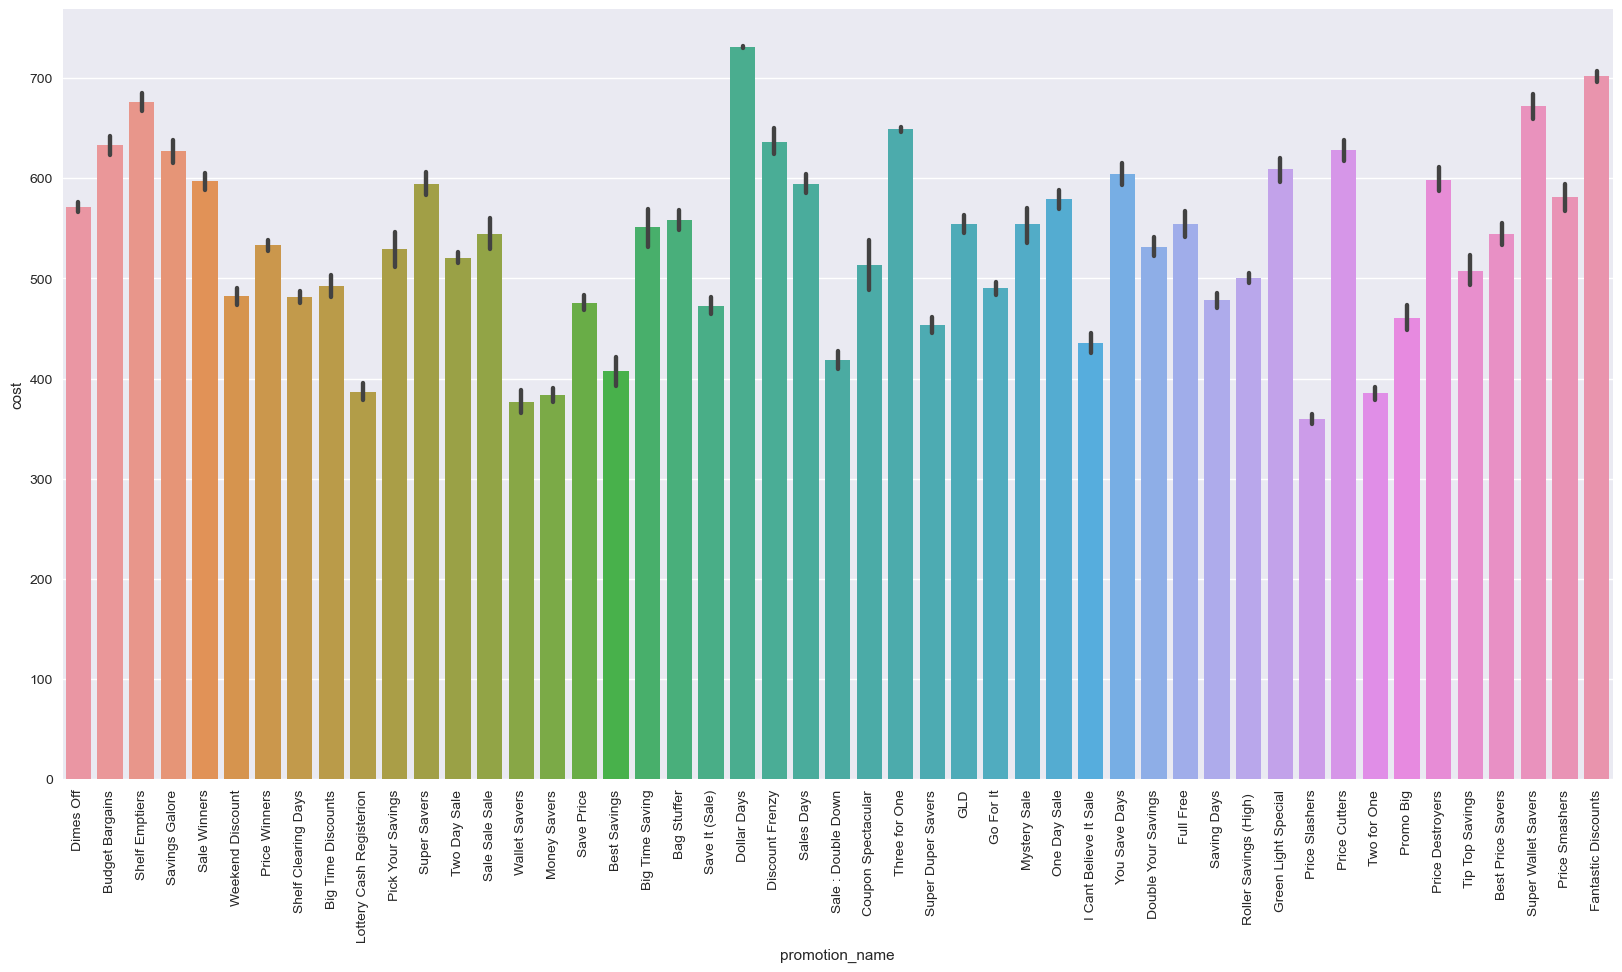

In [36]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.barplot(x=train['promotion_name'], y=train['cost'])

Looks like this column has high correlation with the target variable so we will keep it. 

#### Store Kind column

In [37]:
train['store_kind'].value_counts()

store_kind
Supermarket      14310
Deluxe           12600
Gourmet           3554
Mid-Size          1497
Small Grocery     1085
Name: count, dtype: int64

#### Store sales column

In [38]:
train['store_sales'] = train['store_sales'].str.replace('Millions', '')
train['store_sales'] = train['store_sales'].str.replace('M', '')

In [39]:
train['store_sales'] = train['store_sales'].str.strip(' ')

In [40]:
train['store_sales'] = train['store_sales'].astype(float)

#### Store cost column

In [41]:
train['store_cost'] = train['store_cost'].str.replace('Millions', '')
train['store_cost'] = train['store_cost'].str.replace('M', '')

In [42]:
train['store_cost'] = train['store_cost'].str.strip(' ')

In [43]:
train['store_cost'] = train['store_cost'].astype(float)

#### Is Recyclable? column

In [44]:
train['is_recyclable?'].value_counts()

is_recyclable?
recyclable        10842
yes               10781
no                 8639
non recyclable     8590
Name: count, dtype: int64

In [45]:
train['is_recyclable?'] = train['is_recyclable?'].replace('recyclable', 1)
train['is_recyclable?'] = train['is_recyclable?'].replace('non recyclable', 0)
train['is_recyclable?'] = train['is_recyclable?'].replace('yes', 1)
train['is_recyclable?'] = train['is_recyclable?'].replace('no', 0)

In [46]:
train['is_recyclable?'].value_counts()

is_recyclable?
1.0    21623
0.0    17229
Name: count, dtype: int64

#### Yearly Income column

In [47]:
train['yearly_income'].value_counts()

yearly_income
30K+      12466
10K+       8371
50K+       6748
70K+       4824
130K+      2170
90K+       1783
110K+      1684
150K+       799
130K+.        1
Name: count, dtype: int64

In [48]:
train['yearly_income'] = train['yearly_income'].str.strip('.')

In [49]:
train['yearly_income'].value_counts()

yearly_income
30K+     12466
10K+      8371
50K+      6748
70K+      4824
130K+     2171
90K+      1783
110K+     1684
150K+      799
Name: count, dtype: int64

#### Store Area column

In [50]:
train['store_area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 38854 entries, 0 to 38853
Series name: store_area
Non-Null Count  Dtype 
--------------  ----- 
35290 non-null  object
dtypes: object(1)
memory usage: 303.7+ KB


In [51]:
train['store_area'] = pd.to_numeric(train['store_area'], errors='coerce')

In [52]:
train['store_area'].describe()

count    35289.000000
mean      2597.984958
std        528.792029
min       1882.700000
25%       2189.410000
50%       2572.860000
75%       2863.830000
max       7857.550000
Name: store_area, dtype: float64

#### Grocery Area column

In [53]:
train['grocery_area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 38854 entries, 0 to 38853
Series name: grocery_area
Non-Null Count  Dtype 
--------------  ----- 
35249 non-null  object
dtypes: object(1)
memory usage: 303.7+ KB


In [54]:
train['grocery_area'] = pd.to_numeric(train['grocery_area'], errors='coerce')

In [55]:
train['grocery_area'].describe()

count    35246.000000
mean      1775.530909
std        371.312101
min       1233.080000
25%       1507.542500
50%       1734.500000
75%       2052.620000
max       8103.200000
Name: grocery_area, dtype: float64

#### Frozen Area column

In [56]:
train['frozen_area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 38854 entries, 0 to 38853
Series name: frozen_area
Non-Null Count  Dtype 
--------------  ----- 
35303 non-null  object
dtypes: object(1)
memory usage: 303.7+ KB


In [57]:
train['frozen_area'] = pd.to_numeric(train['frozen_area'], errors='coerce')

In [58]:
train['frozen_area'].describe()

count    35301.000000
mean       493.535732
std        145.971338
min        227.800000
25%        440.920000
50%        470.270000
75%        534.290000
max       1783.640000
Name: frozen_area, dtype: float64

#### Meat Area column

In [59]:
train['meat_area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 38854 entries, 0 to 38853
Series name: meat_area
Non-Null Count  Dtype 
--------------  ----- 
35307 non-null  object
dtypes: object(1)
memory usage: 303.7+ KB


In [60]:
train['meat_area'] = pd.to_numeric(train['meat_area'], errors='coerce')

In [61]:
train['meat_area'].describe()

count    35306.000000
mean       328.939607
std         97.118394
min        149.900000
25%        293.272500
50%        313.550000
75%        356.190000
max        570.740000
Name: meat_area, dtype: float64

#### Cost column


In [62]:
train['cost'].describe()  

count    38823.000000
mean       519.238529
std        156.878604
min        265.631700
25%        364.269500
50%        515.259600
75%        662.222600
max        783.192500
Name: cost, dtype: float64

### Hadling Outliers

In [63]:
num_cols = train[['store_sales','store_cost','grocery_area','frozen_area','meat_area','gross_weight','net_weight','package_weight']]
train.drop(num_cols, axis=1, inplace=True)

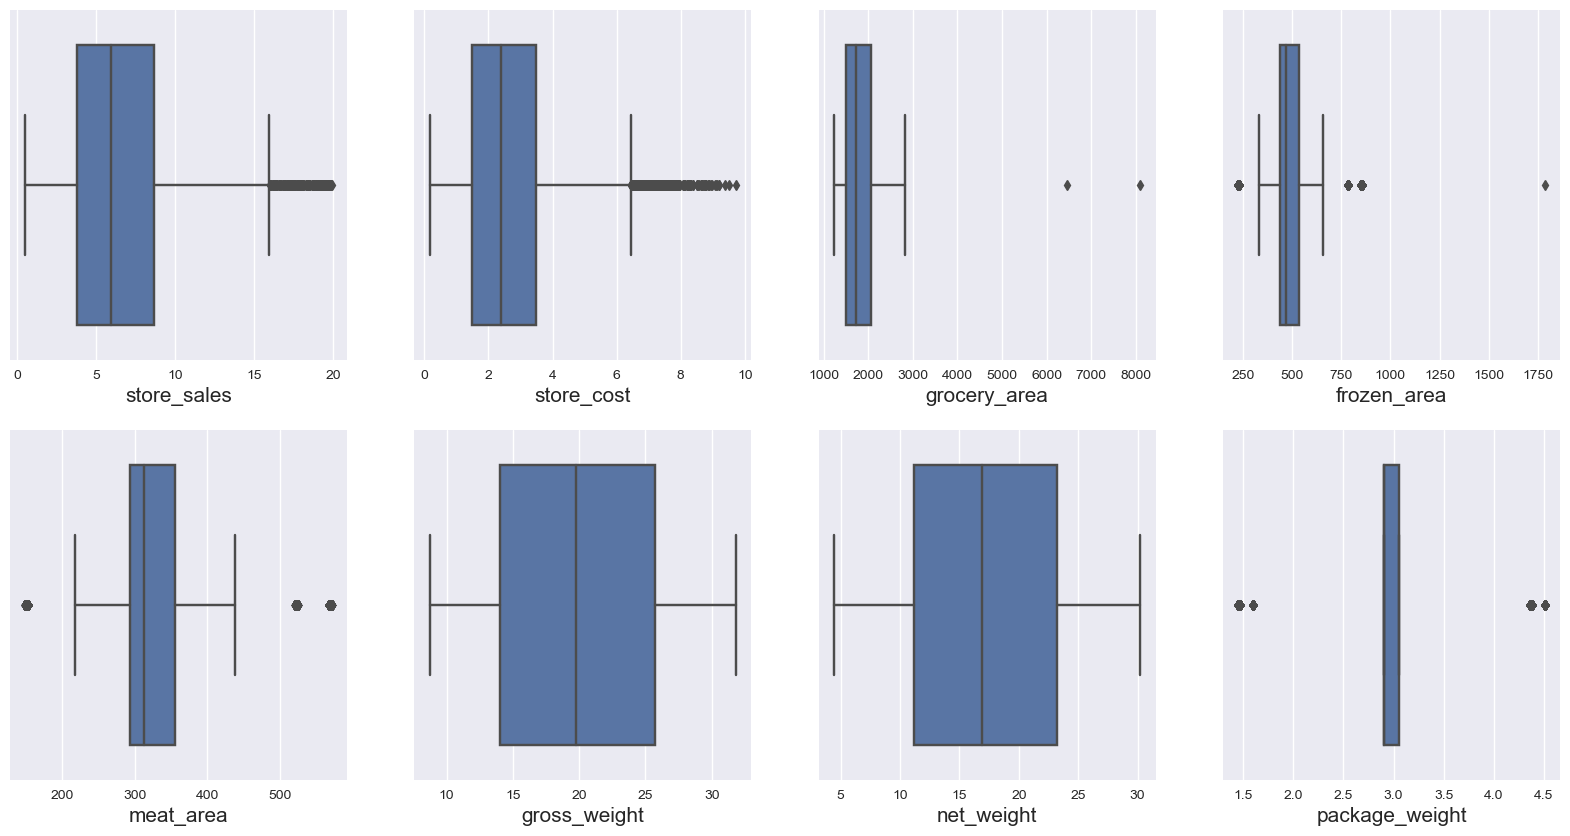

In [64]:
plt.figure(figsize=(20,10))
for i,col in enumerate(num_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(data =num_cols ,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

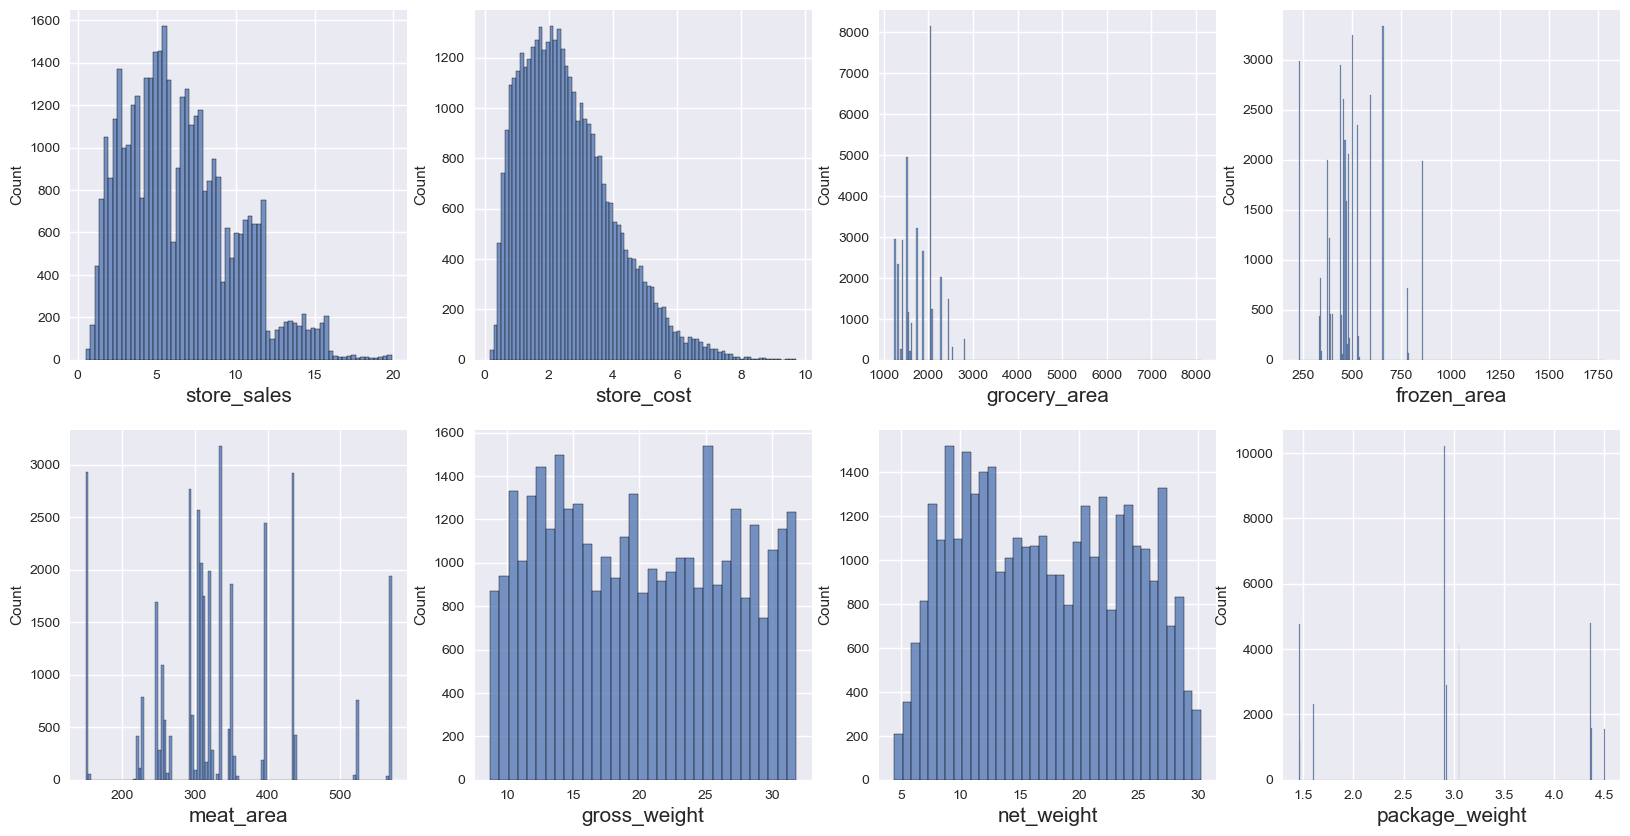

In [65]:
plt.figure(figsize=(20,10))
for i,col in enumerate(num_cols):
    plt.subplot(2,4,i+1)
    sns.histplot(data = num_cols,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

In [66]:
def detect_outliers(df):
    for col in df.select_dtypes('float64').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        df.loc[(df[col] < lower) , col] = lower 
        df.loc[(df[col] > upper) , col] = upper 

In [67]:
detect_outliers(num_cols)

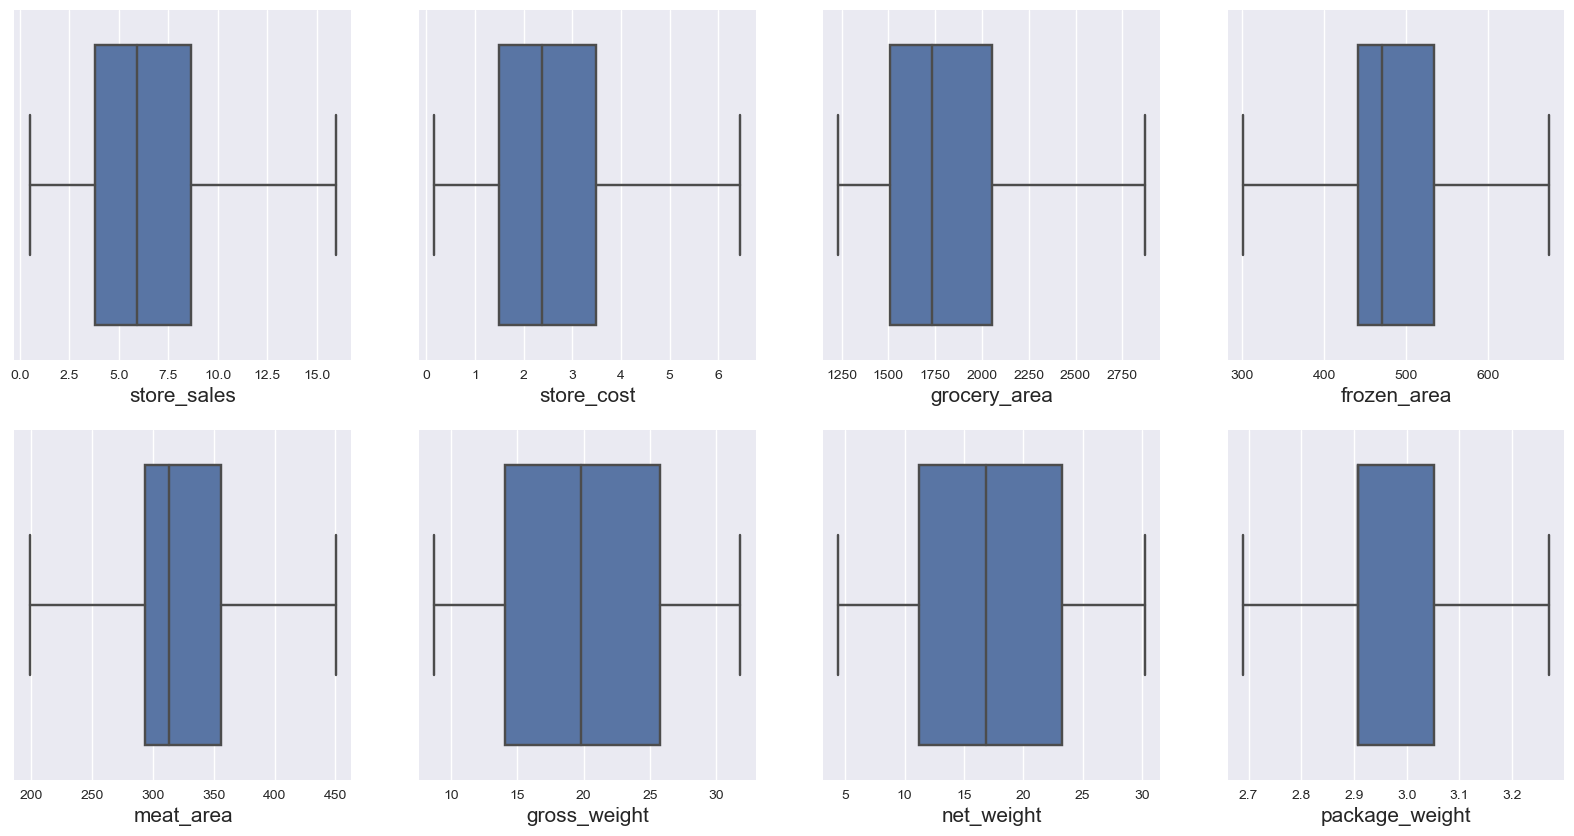

In [68]:
plt.figure(figsize=(20,10))
for i,col in enumerate(num_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(data = num_cols,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

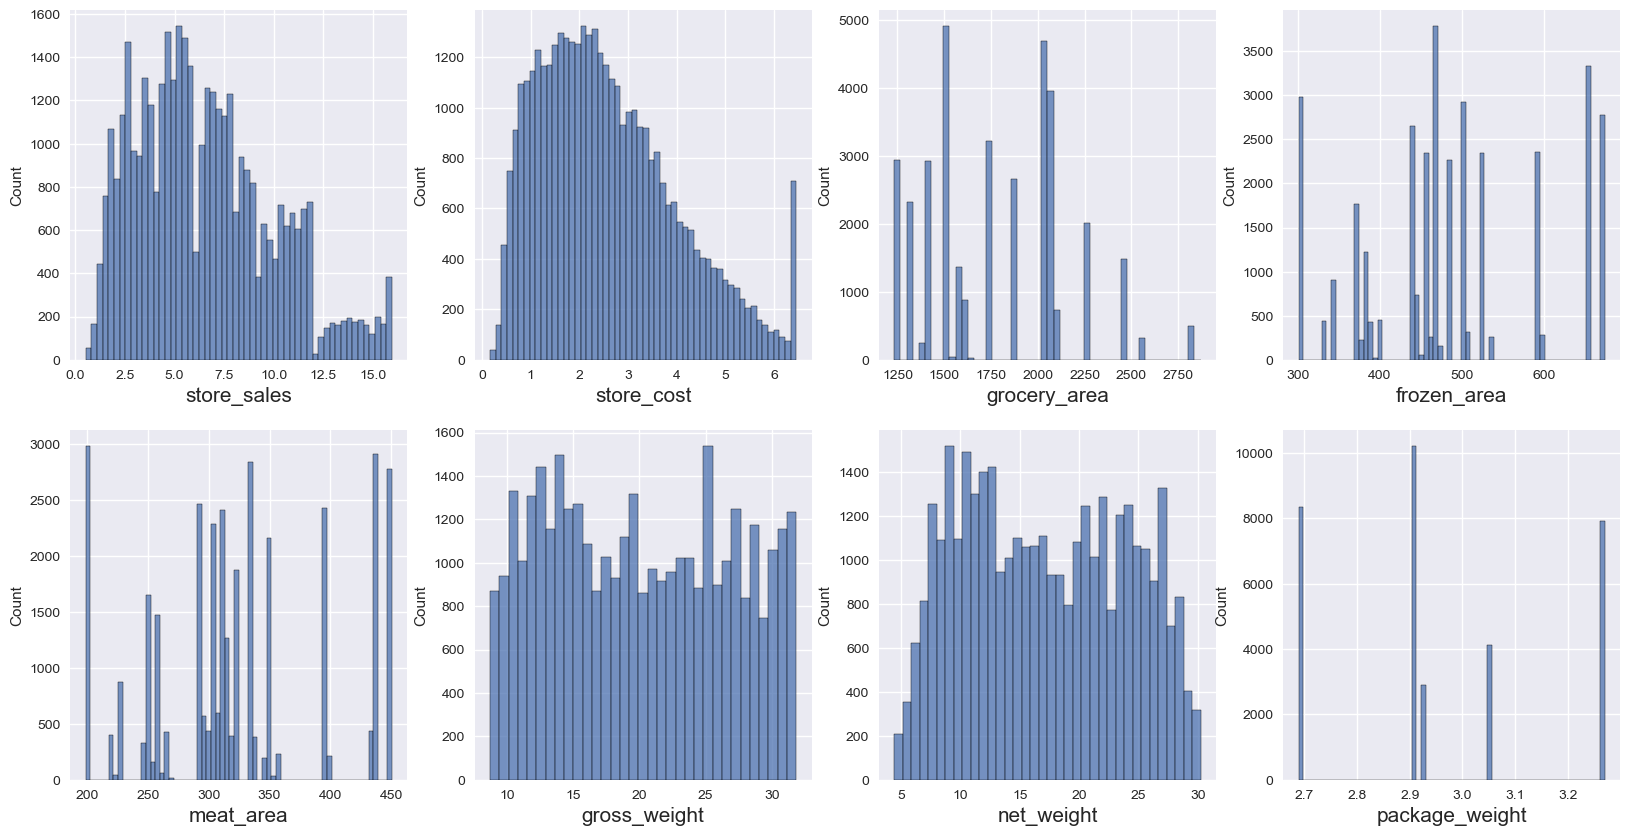

In [69]:
plt.figure(figsize=(20,10))
for i,col in enumerate(num_cols):
    plt.subplot(2,4,i+1)
    sns.histplot(data = num_cols,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

In [70]:
train = pd.concat([train, num_cols], axis=1)

### Handling the null values

In [71]:
train.isnull().sum() / train.shape[0] * 100

promotion_name           14.999743
store_kind               14.948268
is_recyclable?            0.005147
yearly_income             0.020590
store_area                9.175374
cost                      0.079786
marital_status            0.000000
gender                    0.000000
number_of_children        0.000000
profession                0.000000
place_name                0.000000
department                0.005147
florist_feature           0.000000
video_store_feature       0.000000
coffee_bar_feature        0.000000
bar_for_salad_feature     0.000000
ready_food_feature        0.000000
store_sales               0.038606
store_cost                0.018016
grocery_area              9.286045
frozen_area               9.144490
meat_area                 9.131621
gross_weight              7.507593
net_weight                7.445823
package_weight           13.810676
dtype: float64

In [72]:
train.isnull().sum()

promotion_name           5828
store_kind               5808
is_recyclable?              2
yearly_income               8
store_area               3565
cost                       31
marital_status              0
gender                      0
number_of_children          0
profession                  0
place_name                  0
department                  2
florist_feature             0
video_store_feature         0
coffee_bar_feature          0
bar_for_salad_feature       0
ready_food_feature          0
store_sales                15
store_cost                  7
grocery_area             3608
frozen_area              3553
meat_area                3548
gross_weight             2917
net_weight               2893
package_weight           5366
dtype: int64

#### Promotion Name column

In [73]:
train['promotion_name'].isnull().sum()

5828

In [74]:
train['promotion_name'] = train['promotion_name'].fillna('No Promotion')

#### Store Kind column

<Axes: xlabel='store_kind', ylabel='cost'>

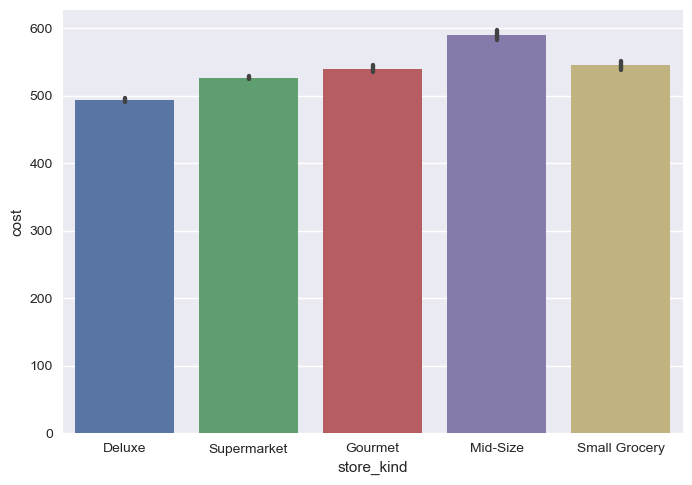

In [75]:
sns.barplot(x=train['store_kind'], y=train['cost'])

In [76]:
train['store_kind'].value_counts(normalize=True) 

store_kind
Supermarket      0.433033
Deluxe           0.381287
Gourmet          0.107547
Mid-Size         0.045300
Small Grocery    0.032833
Name: proportion, dtype: float64

In [77]:
categories = ['Deluxe', 'Supermarket', 'Gourmet', 'Mid-Size', 'Small Grocery']

for i in range(len(train)):
    if pd.isna(train.loc[i, 'store_kind']):
        decision = np.random.choice(categories, p=[0.433033,0.381287,0.107547,0.045300,0.032833])
        train.loc[i, 'store_kind'] = decision

In [78]:
train['store_kind'].value_counts(normalize=True) 

store_kind
Supermarket      0.425619
Deluxe           0.388943
Gourmet          0.107093
Mid-Size         0.045324
Small Grocery    0.033021
Name: proportion, dtype: float64

#### Store sales column

In [79]:
train['store_sales'].fillna(train['store_sales'].mean(), inplace=True)

#### Store cost column

In [80]:
train['store_cost'].fillna(train['store_cost'].mean(), inplace=True)

##### Is Recyclable? column

In [81]:
train['is_recyclable?'].fillna( 1, inplace=True)

#### Yearly Income column

In [82]:
train['yearly_income'].value_counts(normalize=True)

yearly_income
30K+     0.320908
10K+     0.215492
50K+     0.173712
70K+     0.124183
130K+    0.055887
90K+     0.045899
110K+    0.043351
150K+    0.020568
Name: proportion, dtype: float64

In [83]:
train['yearly_income'].fillna('30K+', inplace=True)

#### Store Area column

In [84]:
train['store_area'].fillna(train['store_area'].mean(), inplace=True)

In [85]:
train['grocery_area'].fillna(train['grocery_area'].mean(), inplace=True)
train['frozen_area'].fillna(train['frozen_area'].mean(), inplace=True)
train['meat_area'].fillna(train['meat_area'].mean(), inplace=True)

#### Grocery Area column

In [86]:
train[['store_area', 'grocery_area', 'frozen_area', 'meat_area']].corr()

,store_area,grocery_area,frozen_area,meat_area
store_area,1.000000,0.828459,0.681161,0.683789
grocery_area,0.828459,1.000000,0.400515,0.402405
frozen_area,0.681161,0.400515,1.000000,0.908698
meat_area,0.683789,0.402405,0.908698,1.000000


After some research we found that :
- the store area is eqaul to the sum of the grocery area and the frozen area and the meat area so we can drop the store area column.
- the correlation between the frozen area and meat area is equal to 0.91 so we can drop one of them.

In [87]:
train.drop(columns=['store_area','meat_area'], axis=1, inplace=True)  

#### Cost column

In [88]:
train['cost'].fillna(train['cost'].mean(), inplace=True)

#### Gross Weight column    

In [89]:
train[['gross_weight', 'net_weight', 'package_weight','cost']].corr()

,gross_weight,net_weight,package_weight,cost
gross_weight,1.000000,0.988901,0.020195,-0.002973
net_weight,0.988901,1.000000,-0.125895,-0.001043
package_weight,0.020195,-0.125895,1.000000,0.002283
cost,-0.002973,-0.001043,0.002283,1.000000


After some research we found that :
- the gross weight is equal to the sum of the net weight and the package weight so we can drop the gross weight column.
- the package weight has alot of missing values so we can drop it.

In [90]:
train.drop(columns=['gross_weight', 'package_weight'], axis=1, inplace=True)

In [91]:
train['net_weight'].fillna(train['net_weight'].mean(), inplace=True)

#### Department column

In [92]:
train['department'].value_counts()

department
Produce department                5573
Snack Foods department            4470
Household department              4022
Frozen Foods department           3927
Baking Goods department           2878
Canned Foods department           2721
Dairy department                  2434
Health and Hygiene department     2410
Beverages department              1916
Deli department                   1806
Baked Goods department            1143
Alcoholic Beverages department    1016
Snacks department                 1008
Starchy Foods department           681
Eggs department                    615
Periodicals department             611
Breakfast Foods department         494
Canned Products department         260
Checkout department                246
Seafood department                 241
Meat department                    240
Carousel department                140
Name: count, dtype: int64

In [93]:
train['department'].fillna('Produce department', inplace=True)

#### Bar for salad column

In [94]:
train[['video_store_feature', 'coffee_bar_feature', 'bar_for_salad_feature', 'ready_food_feature']].corr()

,video_store_feature,coffee_bar_feature,bar_for_salad_feature,ready_food_feature
video_store_feature,1.000000,0.590076,0.622329,0.622329
coffee_bar_feature,0.590076,1.000000,0.533832,0.533832
bar_for_salad_feature,0.622329,0.533832,1.000000,1.000000
ready_food_feature,0.622329,0.533832,1.000000,1.000000


Since the bar for salad column is highly correlated with the ready food column we can drop it.

In [95]:
train.drop('bar_for_salad_feature', axis=1, inplace=True)

In [96]:
train.shape

(38854, 20)

### Feature Engineering and Selection

#### Store Kind column

<Axes: xlabel='store_kind', ylabel='cost'>

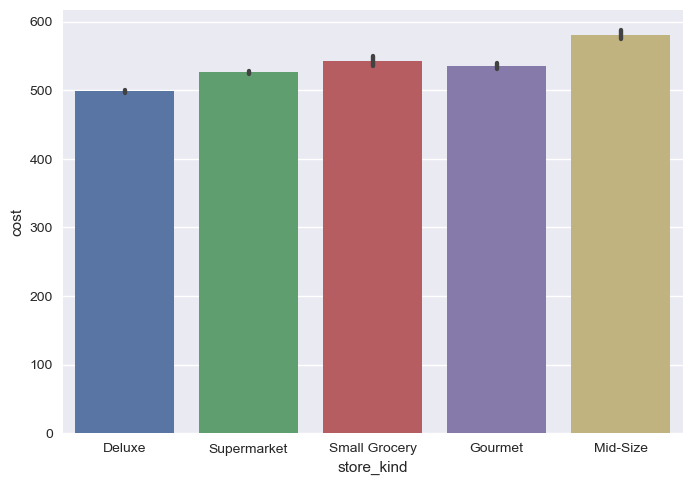

In [97]:
sns.barplot(x = train['store_kind'], y = train['cost'])

<Axes: xlabel='store_kind', ylabel='count'>

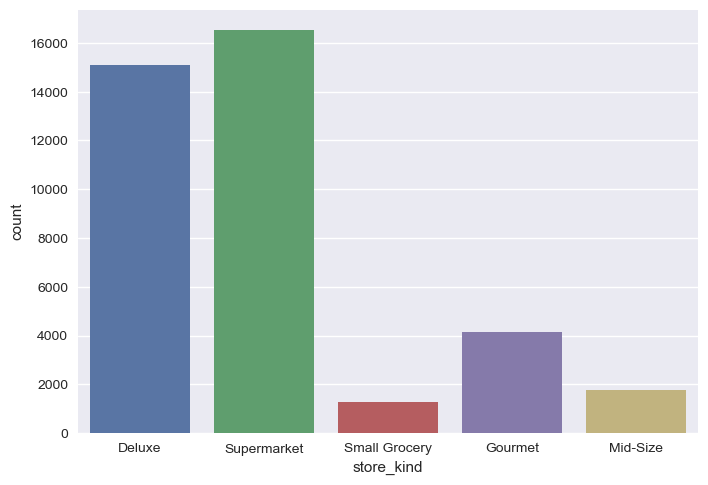

In [98]:
sns.countplot(x = train['store_kind'])

#### Is Recyclable? column

<Axes: xlabel='is_recyclable?', ylabel='cost'>

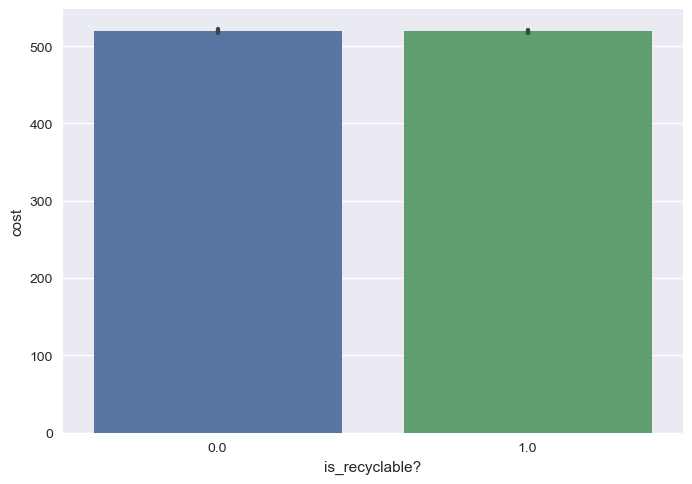

In [99]:
sns.barplot(x = train['is_recyclable?'], y = train['cost'])

In [100]:
train.drop('is_recyclable?', axis=1, inplace=True)

#### Yearly Income column

<Axes: xlabel='yearly_income', ylabel='cost'>

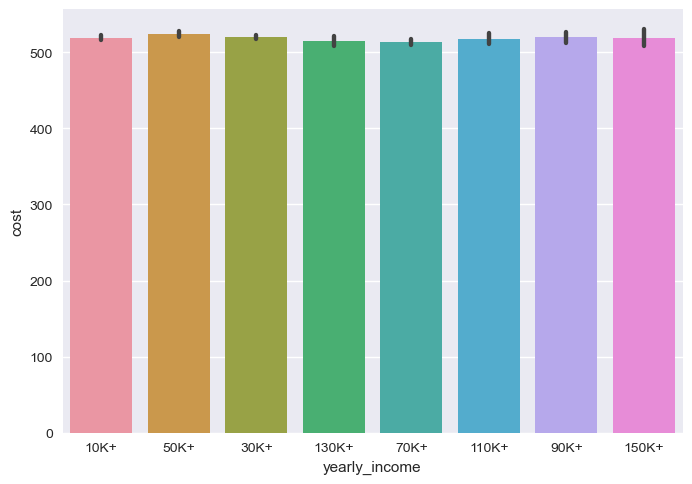

In [101]:
sns.barplot(x = 'yearly_income', y = 'cost', data = train)

In [102]:
train['yearly_income'] = train['yearly_income'].str.replace('K', '')
train['yearly_income'] = train['yearly_income'].str.replace('+', '')

In [103]:
train['yearly_income'] = train['yearly_income'].astype(int)

In [104]:
train['yearly_income'].describe()

count    38854.000000
mean        48.406856
std         36.235269
min         10.000000
25%         30.000000
50%         30.000000
75%         70.000000
max        150.000000
Name: yearly_income, dtype: float64

<Axes: xlabel='yearly_income', ylabel='cost'>

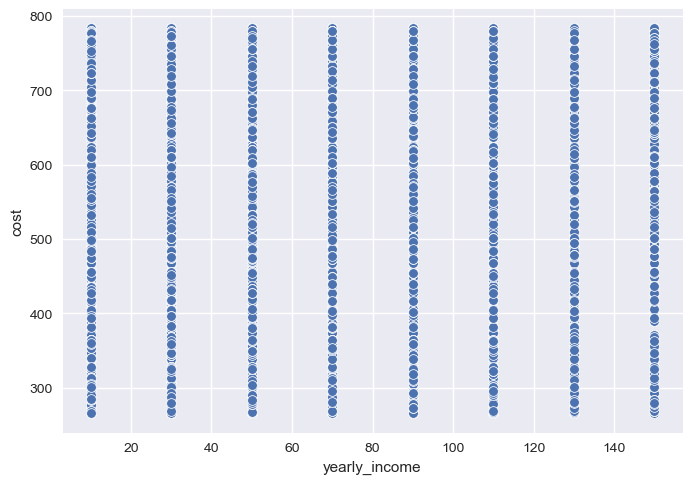

In [105]:
sns.scatterplot(x = 'yearly_income', y = 'cost', data = train)

In [106]:
train.drop('yearly_income', axis=1, inplace=True)

#### Department column

<Axes: xlabel='department', ylabel='cost'>

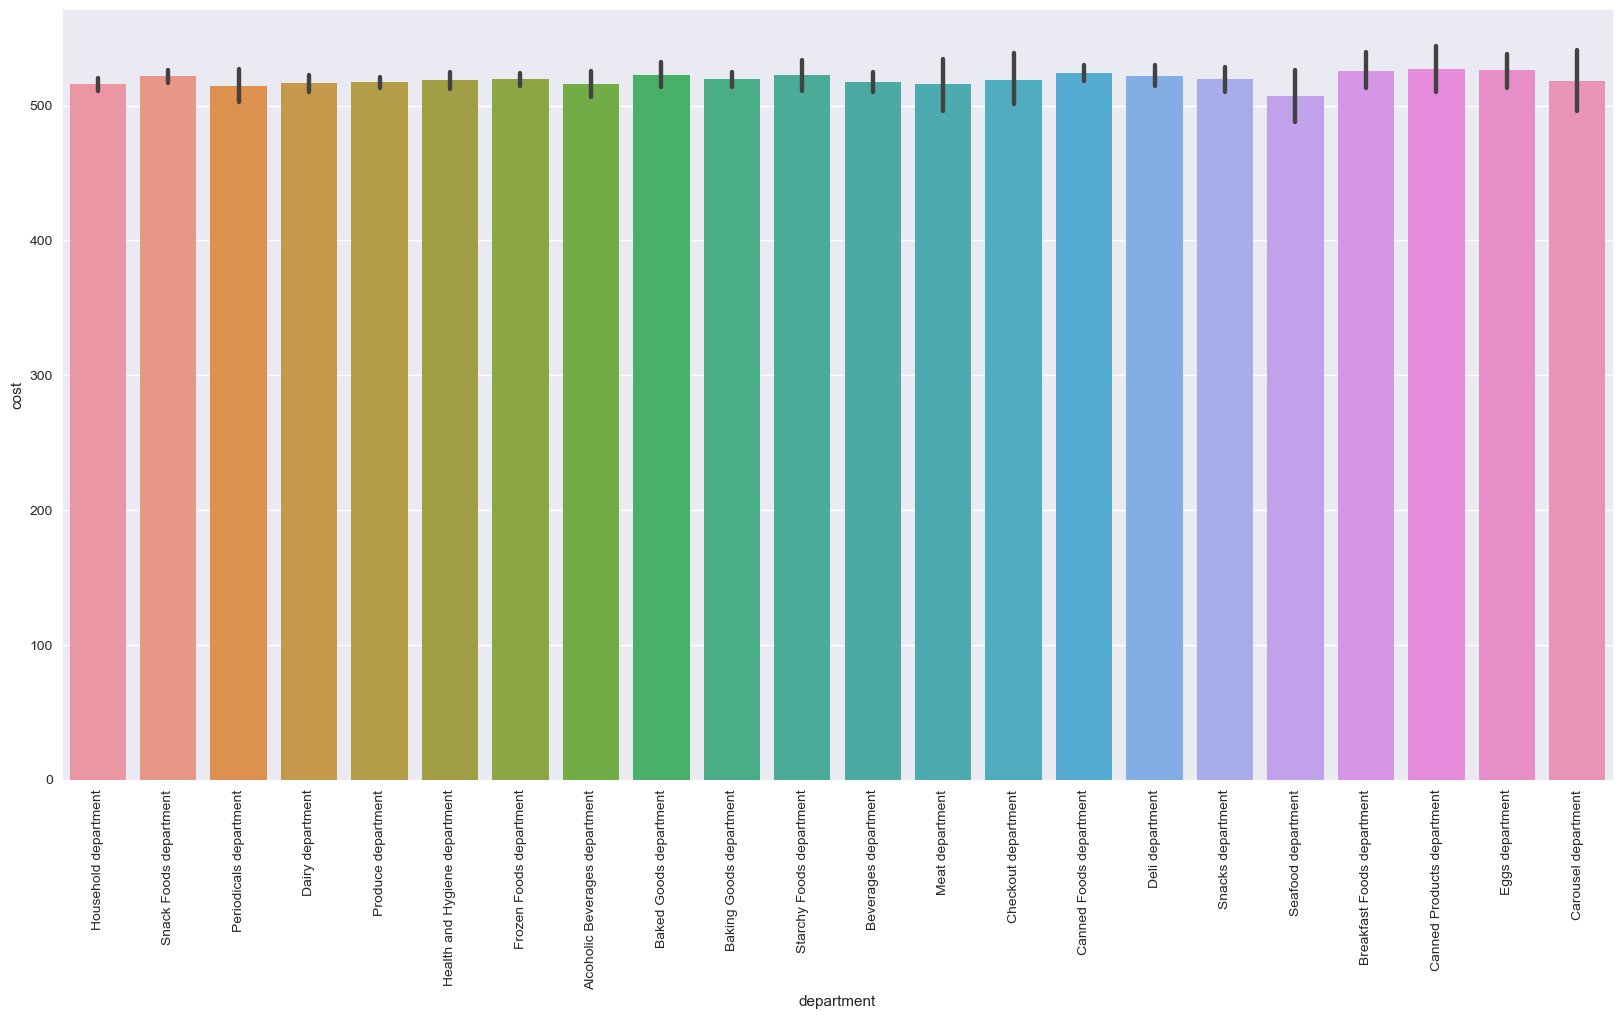

In [107]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x = 'department', y = 'cost', data = train)

In [108]:
train.drop('department', axis=1, inplace=True)

#### Number of children column

<Axes: xlabel='number_of_children', ylabel='cost'>

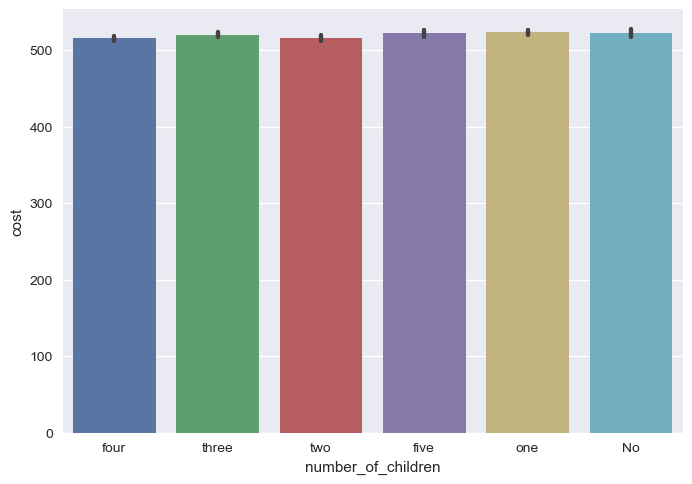

In [109]:
sns.barplot(x = train['number_of_children'], y = train['cost'])

In [110]:
train.drop('number_of_children', axis=1, inplace=True)

<Axes: xlabel='profession', ylabel='cost'>

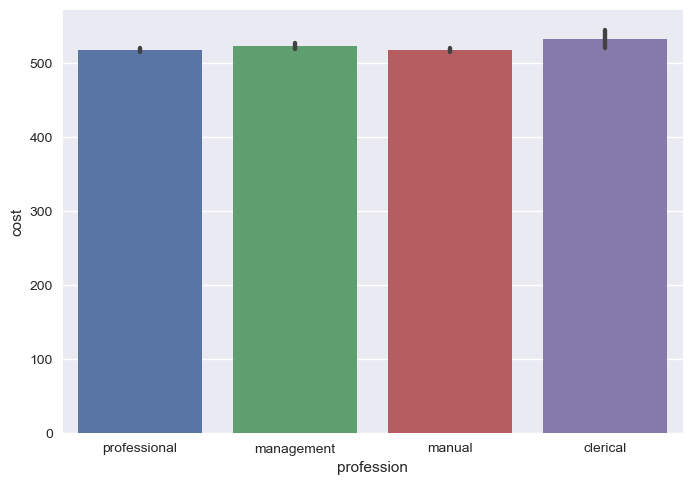

In [111]:
sns.barplot(x = train['profession'], y = train['cost'])

In [112]:
train.drop('profession', axis=1, inplace=True)

#### Place name column

<Axes: xlabel='place_name', ylabel='cost'>

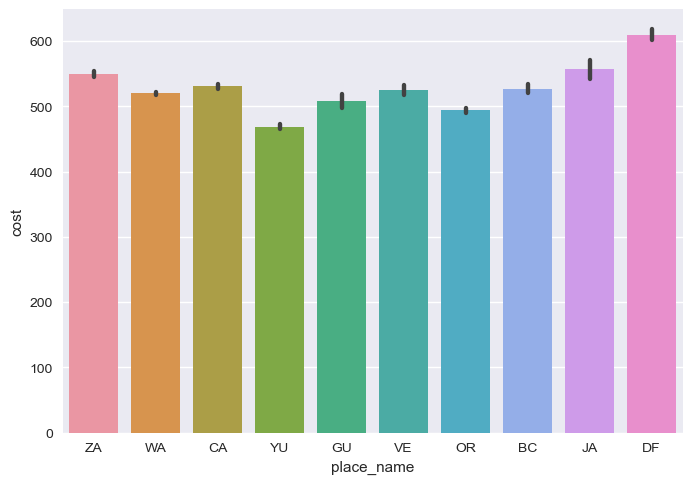

In [113]:
sns.barplot(x = train['place_name'], y = train['cost'])

#### Marital status column

<Axes: xlabel='marital_status', ylabel='cost'>

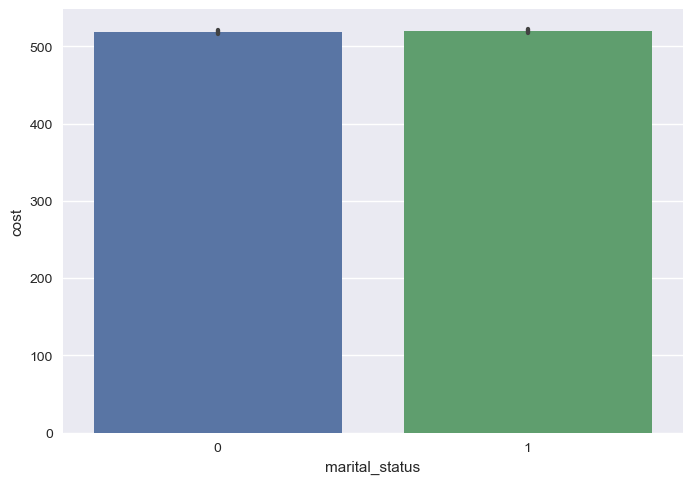

In [114]:
sns.barplot(x = train['marital_status'], y = train['cost'])

<Axes: xlabel='gender', ylabel='cost'>

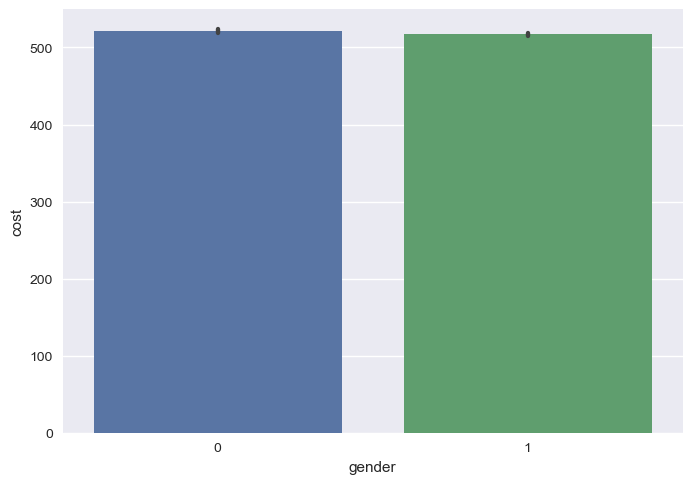

In [115]:
sns.barplot(x = train['gender'], y = train['cost'])

In [116]:
train.drop('marital_status', axis=1, inplace=True)
train.drop('gender', axis=1, inplace=True)

### Encoding the categorical columns

In [117]:
train['promotion_name'].unique()

array(['Dimes Off', 'Budget Bargains', 'Shelf Emptiers', 'Savings Galore',
       'Sale Winners', 'Weekend Discount', 'Price Winners',
       'Shelf Clearing Days', 'Big Time Discounts',
       'Lottery Cash Registerion', 'Pick Your Savings', 'No Promotion',
       'Super Savers', 'Two Day Sale', 'Sale Sale Sale', 'Wallet Savers',
       'Money Savers', 'Save Price', 'Best Savings', 'Big Time Saving',
       'Bag Stuffer', 'Save It (Sale)', 'Dollar Days', 'Discount Frenzy',
       'Sales Days', 'Sale : Double Down', 'Coupon Spectacular',
       'Three for One', 'Super Duper Savers', 'GLD', 'Go For It',
       'Mystery Sale', 'One Day Sale', 'I Cant Believe It Sale',
       'You Save Days', 'Double Your Savings', 'Full Free', 'Saving Days',
       'Roller Savings (High) ', 'Green Light Special', 'Price Slashers',
       'Price Cutters', 'Two for One', 'Promo Big', 'Price Destroyers',
       'Tip Top Savings', 'Best Price Savers', 'Super Wallet Savers',
       'Price Smashers', 'Fantasti

In [118]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False )
arr = ohe.fit_transform(train[['promotion_name']])
transformed_col = pd.DataFrame(arr)
transformed_col.columns = ['Bag Stuffer', 'Best Price Savers', 'Best Savings', 'Big Time Discounts', 'Big Time Saving', 'Budget Bargains', 'Coupon Spectacular', 'Dimes Off', 'Discount Frenzy', 'Dollar Days', 'Double Your Savings', 'Fantastic Discounts', 'Full Free', 'GLD', 'Go For It', 'Green Light Special', 'I Cant Believe It Sale', 'Lottery Cash Registerion', 'Money Savers', 'Mystery Sale', 'No Promotion', 'One Day Sale', 'Pick Your Savings', 'Price Cutters', 'Price Destroyers', 'Price Slashers', 'Price Smashers', 'Price Winners', 'Promo Big', 'Roller Savings (High) ', 'Sale : Double Down', 'Sale Sale Sale', 'Sale Winners', 'Sales Days', 'Save It (Sale)', 'Save Price', 'Saving Days', 'Savings Galore', 'Shelf Clearing Days', 'Shelf Emptiers', 'Super Duper Savers', 'Super Savers', 'Super Wallet Savers', 'Three for One', 'Tip Top Savings', 'Two Day Sale', 'Two for One', 'Wallet Savers', 'Weekend Discount', 'You Save Days']
transformed_col

c:\Users\Abdul\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Bag Stuffer,Best Price Savers,Best Savings,Big Time Discounts,Big Time Saving,Budget Bargains,Coupon Spectacular,Dimes Off,Discount Frenzy,Dollar Days,...,Super Duper Savers,Super Savers,Super Wallet Savers,Three for One,Tip Top Savings,Two Day Sale,Two for One,Wallet Savers,Weekend Discount,You Save Days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38852,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
train = train.join(transformed_col)
train.drop('promotion_name',axis = 1 , inplace=True)

#### Store Kind column

In [120]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False )
arr = ohe.fit_transform(train[['store_kind']])
transformed_col = pd.DataFrame(arr)
transformed_col.columns = ['Deluxe', 'Gourmet', 'Mid-Size', 'Small Grocery', 'Supermarket']
transformed_col

c:\Users\Abdul\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Deluxe,Gourmet,Mid-Size,Small Grocery,Supermarket
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
38849,0.0,0.0,0.0,0.0,1.0
38850,1.0,0.0,0.0,0.0,0.0
38851,0.0,0.0,0.0,0.0,1.0
38852,0.0,0.0,0.0,0.0,1.0


In [121]:
train = train.join(transformed_col)
train.drop('store_kind',axis = 1 , inplace=True)

#### Place Name column

In [122]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False )
arr = ohe.fit_transform(train[['place_name']])
transformed_col = pd.DataFrame(arr)
transformed_col.columns = ['BC','CA','DF','GU','JA','OR','VE','WA','YU','ZA']
transformed_col

c:\Users\Abdul\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,BC,CA,DF,GU,JA,OR,VE,WA,YU,ZA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
38849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [123]:
train = train.join(transformed_col)
train.drop('place_name',axis = 1 , inplace=True)

In [124]:
test.head(5)

,unnamed:_0,person_description,place_code,customer_order,additional_features_in_market,promotion_name,store_kind,store_sales,store_cost,gross_weight,net_weight,package_weight,is_recyclable?,yearly_income,store_area,grocery_area,frozen_area,meat_area
0,0,"Single Male with four children, education: par...",B06ls_CA,"Candy from Snacks department, Ordered Brand : ...","['Florist', 'Ready Food', 'Video Store', 'Bar ...",Fantastic Discounts,Gourmet,11.76 Millions,4.704 Millions,31.8337,28.7811,3.0525,yes,50K+,2201.06,1424.85,465.54,308.73
1,1,"Married Female with three children, education:...",S01em_OR,"Vegetables from Frozen Foods department, Order...","['Florist', 'Coffee Bar', 'Ready Food', 'Bar F...",Bag Stuffer,Deluxe,2.16 Millions,0.6696 Millions,29.9440,27.0368,2.9072,no,70K+,2577.16,1735.17,505.07,336.59
2,2,"Single Female with three children, education: ...",H11go_ZA,"Dairy from Dairy department, Ordered Brand : Club","['Bar For Salad', 'Video Store', 'Ready Food',...",Pick Your Savings,Deluxe,1.83 Millions,0.8235 Millions,29.2172,26.3100,2.9072,no,130K+,2837.58,2038.11,481.98,321.26
3,3,"Single Male with three children, education: pa...",M10da_YU,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Video Store', 'Bar For Salad',...",Price Winners,Deluxe,8.82 Millions,4.41 Millions,28.0543,25.0018,3.0525,no,10K+,2859.04,1871.16,593.93,394.58
4,4,"Single Male with two children, education: high...",L05es_CA,"Hot Beverages from Beverages department, Order...",['Florist'],Dollar Days,Supermarket,4.32 Millions,1.9872 Millions,23.5482,20.6410,2.9072,no,30K+,2193.97,1320.15,523.32,348.85


### Test data

In [125]:
test_ids = test['unnamed:_0']

In [126]:
test.drop(['unnamed:_0'], axis=1, inplace=True)

In [127]:
test.duplicated().sum()

0

### Cleaning the test data

In [128]:
test['person_description'] = test['person_description'].str.split(' ')

In [129]:
test['marital_status'] = test['person_description'].apply(lambda x: x[0])
test['gender'] = test['person_description'].apply(lambda x: x[1])
test['number_of_children'] = test['person_description'].apply(lambda x: x[3])
test['profession'] = test['person_description'].apply(lambda x: x[-1]) 

In [130]:
test['marital_status'] = test['marital_status'].apply(lambda x: 1 if x == 'Married' else 0)
test['gender'] = test['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [131]:
test.drop('person_description', axis=1, inplace=True)  

In [132]:
test[['place_id', 'place_name']] = test['place_code'].str.split('_', expand=True)

In [133]:
test.drop('place_code', axis=1, inplace=True)
test.drop('place_id', axis=1, inplace=True)

In [134]:
test[['department','brand']] = test['customer_order'].str.split(',', expand=True)

In [135]:
test[['x','department']] = test['department'].str.split('from', expand=True)

In [136]:
test['department'] = test['department'].str.strip(' ')

In [137]:
test.drop(columns=['customer_order', 'x','brand'], axis=1, inplace=True)

In [138]:
test['additional_features_in_market'] = test['additional_features_in_market'].str.replace('[', '')
test['additional_features_in_market'] = test['additional_features_in_market'].str.replace(']', '')
test['additional_features_in_market'] = test['additional_features_in_market'].str.replace(",", '')
test['additional_features_in_market'] = test['additional_features_in_market'].str.replace("'", '')

In [139]:
test['additional_features_in_market'] = test['additional_features_in_market'].astype(str)
test['additional_features_in_market'] = test['additional_features_in_market'].str.lower()

In [140]:
test['florist_feature'] = test['additional_features_in_market'].str.contains('florist').astype(int)
test['video_store_feature'] = test['additional_features_in_market'].str.contains('video store').astype(int)
test['coffee_bar_feature'] = test['additional_features_in_market'].str.contains('coffee bar').astype(int)     
test['bar_for_salad_feature'] = test['additional_features_in_market'].str.contains('bar for salad').astype(int)
test['ready_food_feature'] = test['additional_features_in_market'].str.contains('ready food').astype(int)

In [141]:
test.drop('additional_features_in_market', axis=1, inplace=True)

In [142]:
test['store_sales'] = test['store_sales'].str.replace('Millions', '')
test['store_sales'] = test['store_sales'].str.replace('M', '')

In [143]:
test['store_sales'] = test['store_sales'].str.strip(' ')

In [144]:
test['store_sales'] = test['store_sales'].astype(float)

In [145]:
test['store_cost'] = test['store_cost'].str.replace('Millions', '')
test['store_cost'] = test['store_cost'].str.replace('M', '')

In [146]:
test['store_cost'] = test['store_cost'].str.strip(' ')

In [147]:
test['store_cost'] = test['store_cost'].astype(float)

In [148]:
test['is_recyclable?'] = test['is_recyclable?'].replace('recyclable', 1)
test['is_recyclable?'] = test['is_recyclable?'].replace('non recyclable', 0)
test['is_recyclable?'] = test['is_recyclable?'].replace('yes', 1)
test['is_recyclable?'] = test['is_recyclable?'].replace('no', 0)

In [149]:
test['yearly_income'] = test['yearly_income'].str.strip('.')

In [150]:
test['store_area'] = pd.to_numeric(test['store_area'], errors='coerce')

In [151]:
test['grocery_area'] = pd.to_numeric(test['grocery_area'], errors='coerce')

In [152]:
test['frozen_area'] = pd.to_numeric(test['frozen_area'], errors='coerce')

In [153]:
test['meat_area'] = pd.to_numeric(test['meat_area'], errors='coerce')

### Handling outliers

In [154]:
num_cols = test[['store_sales','store_cost','grocery_area','frozen_area','meat_area','gross_weight','net_weight','package_weight']]
test.drop(num_cols, axis=1, inplace=True)

In [155]:
detect_outliers(num_cols)

In [156]:
test = pd.concat([test, num_cols], axis=1)

### Handling null values

In [157]:
categories = ['Deluxe', 'Supermarket', 'Gourmet', 'Mid-Size', 'Small Grocery']

for i in range(len(test)):
    if pd.isna(test.loc[i, 'store_kind']):
        decision = np.random.choice(categories, p=[0.433033,0.381287,0.107547,0.045300,0.032833])
        train.loc[i, 'store_kind'] = decision

In [158]:
test['promotion_name'].fillna('No Promotion', inplace=True)

In [159]:
test['store_sales'].fillna(train['store_sales'].mean(), inplace=True)

In [160]:
test['store_cost'].fillna(train['store_cost'].mean(), inplace=True)

In [161]:
test['is_recyclable?'].fillna(1, inplace=True)

In [162]:
test['yearly_income'].fillna('30K+', inplace=True)

In [163]:
test['grocery_area'].fillna(train['grocery_area'].mean(), inplace=True)
test['frozen_area'].fillna(train['frozen_area'].mean(), inplace=True)

In [164]:
test.drop(columns=['store_area','meat_area'], axis=1, inplace=True)  

In [165]:
test.drop(columns=['gross_weight', 'package_weight'], axis=1, inplace=True)

In [166]:
test['net_weight'].fillna(train['net_weight'].mean(), inplace=True)

In [167]:
test['department'].fillna('Produce department', inplace=True)

In [168]:
test.drop('bar_for_salad_feature', axis=1, inplace=True)

### Feature Engineering and Selection

In [169]:
test.drop('is_recyclable?', axis=1, inplace=True)

In [170]:
test.drop('yearly_income', axis=1, inplace=True)

In [171]:
test.drop('department', axis=1, inplace=True)

In [172]:
test.drop('number_of_children', axis=1, inplace=True)

In [173]:
test.drop('profession', axis=1, inplace=True)

In [174]:
test.drop('marital_status', axis=1, inplace=True)
test.drop('gender', axis=1, inplace=True)

In [175]:
train.drop(columns = ['florist_feature','video_store_feature','coffee_bar_feature','ready_food_feature'], axis=1, inplace=True)
test.drop(columns = ['florist_feature','video_store_feature','coffee_bar_feature','ready_food_feature'], axis=1, inplace=True)

### Encoding the categorical columns

In [176]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False )
arr = ohe.fit_transform(test[['promotion_name']])
transformed_col = pd.DataFrame(arr)
transformed_col.columns = ['Bag Stuffer', 'Best Price Savers', 'Best Savings', 'Big Time Discounts', 'Big Time Saving', 'Budget Bargains', 'Coupon Spectacular', 'Dimes Off', 'Discount Frenzy', 'Dollar Days', 'Double Your Savings', 'Fantastic Discounts', 'Full Free', 'GLD', 'Go For It', 'Green Light Special', 'I Cant Believe It Sale', 'Lottery Cash Registerion', 'Money Savers', 'Mystery Sale', 'No Promotion', 'One Day Sale', 'Pick Your Savings', 'Price Cutters', 'Price Destroyers', 'Price Slashers', 'Price Smashers', 'Price Winners', 'Promo Big', 'Roller Savings (High) ', 'Sale : Double Down', 'Sale Sale Sale', 'Sale Winners', 'Sales Days', 'Save It (Sale)', 'Save Price', 'Saving Days', 'Savings Galore', 'Shelf Clearing Days', 'Shelf Emptiers', 'Super Duper Savers', 'Super Savers', 'Super Wallet Savers', 'Three for One', 'Tip Top Savings', 'Two Day Sale', 'Two for One', 'Wallet Savers', 'Weekend Discount', 'You Save Days']
transformed_col

c:\Users\Abdul\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Bag Stuffer,Best Price Savers,Best Savings,Big Time Discounts,Big Time Saving,Budget Bargains,Coupon Spectacular,Dimes Off,Discount Frenzy,Dollar Days,...,Super Duper Savers,Super Savers,Super Wallet Savers,Three for One,Tip Top Savings,Two Day Sale,Two for One,Wallet Savers,Weekend Discount,You Save Days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19938,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19940,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
test = test.join(transformed_col)
test.drop('promotion_name',axis = 1 , inplace=True)

In [178]:
test['Deluxe'] = test['store_kind'].apply(lambda x: 1 if x == 'Deluxe' else 0)
test['Gourmet'] = test['store_kind'].apply(lambda x: 1 if x == 'Gourmet' else 0)
test['Mid-Size'] = test['store_kind'].apply(lambda x: 1 if x == 'Mid-Size' else 0)
test['Small Grocery'] = test['store_kind'].apply(lambda x: 1 if x == 'Small Grocery' else 0)
test['Supermarket'] = test['store_kind'].apply(lambda x: 1 if x == 'Supermarket' else 0)

In [179]:
test.drop('store_kind',axis = 1 , inplace=True)

In [180]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False )
arr = ohe.fit_transform(test[['place_name']])
transformed_col = pd.DataFrame(arr)
transformed_col.columns = ['BC','CA','DF','GU','JA','OR','VE','WA','YU','ZA']
transformed_col

c:\Users\Abdul\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,BC,CA,DF,GU,JA,OR,VE,WA,YU,ZA
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19939,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19940,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [181]:
test = test.join(transformed_col)
test.drop('place_name',axis = 1 , inplace=True)

In [182]:
train.drop('store_kind', axis=1, inplace=True)

In [183]:
train.to_csv(r'C:\Users\Abdul\Workspace\IEEE_Victoris2_competition\data_preprocessed\train_preprocessed.csv', index=False)
test.to_csv(r'C:\Users\Abdul\Workspace\IEEE_Victoris2_competition\data_preprocessed\test_preprocessed.csv', index=False)